In [9]:
import pandas as pd
from datetime import datetime

#To manually create dates
time_stamp = pd.Timestamp(datetime(2017,1,1))
pd.Timestamp('2017-01-01') == time_stamp
print(time_stamp)
print(time_stamp.year)
print(time_stamp.day_name())


2017-01-01 00:00:00
2017
Sunday


Period object has freq attribute to store freq info

In [23]:
import pandas as pd
from datetime import datetime

period = pd.Period('2017-01')
print(period.day,"days")
print(period.month,"mth")

31 days
1 mth


date arithmetic

In [1]:
import pandas as pd
from datetime import datetime

period = pd.Period('2017-01')
print(period + 2)

2017-03


In [24]:
import pandas as pd
from datetime import datetime

period = pd.Period('2017-01')
period.asfreq('D')

Period('2017-01-31', 'D')

Freq info enables date arithmetic

In [36]:
import pandas as pd
from datetime import datetime

#no longer supported code recommended on DataCamp
pd.Timestamp('2017-01-31', 'M') + 1


C:\Users\bookk\AppData\Local\Temp\ipykernel_18960\3979816053.py:4: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  pd.Timestamp('2017-01-31', 'M') + 1


TypeError: Addition/subtraction of integers and integer-arrays with Timestamp is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [37]:
import pandas as pd
from datetime import datetime

#replace with workable code 
pd.Period('2017-01-31', 'M') + 1


Period('2017-02', 'M')

In [35]:
import pandas as pd
from datetime import datetime

#time series
index = pd.date_range(start='2017-01-01', periods=12, freq='M')
index

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

In [45]:
import pandas as pd1
from datetime import datetime

#time series
index = pd.date_range(start='2017-01-01', periods=12, freq='M')
#time series can be indexed
index[0:3]


DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31'], dtype='datetime64[ns]', freq='M')

In [1]:
import pandas as pd
from datetime import datetime

#time series
index = pd.date_range(start='2017-01-01', periods=12, freq='M')
#time series can be indexed to period
index.to_period()

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
             '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
            dtype='period[M]')

ns means nanoseconds

In [2]:
pd.DataFrame({'date': index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 224.0 bytes


create 12 rows, 2 columns timestamp series

In [9]:
import pandas as pd
import numpy as np
from datetime import datetime

data = np.random.random((12,2))
pd.DataFrame(data = data, index=index).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2017-01-31 to 2017-12-31
Freq: M
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12 non-null     float64
 1   1       12 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [21]:
import pandas as pd
import numpy as np
from datetime import datetime

# Create the range of dates here
seven_days = pd.date_range(start='2017-01-01', periods=7, freq='D')

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


DateTimeIndex: Upsampling=> incr freq, downsampling=> decr freq

In [2]:
from datetime import datetime
import datetime as dt
import pandas_datareader.data as pdr
import yfinance as yf

yf.pdr_override()
#convert to datetime64
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2015,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)

google.info()

#don't create copy
google.set_index('date', inplace=True)
google.info()

#selecting/indexing strings that parse to dates
google['2015'].info() #Pass string for part of date
google['2015-3':'2016-2'].info() #Slice includes last month

#select specific stock price
google.loc['2016-6-1','price'] #Use full date with .loc[] 

#Convert DateTimeIndex to calendar day freq
google.asfreq('D').info() #set day freq

#Upsampling: higher feq => new dates => missing data
google.asfreq('D').head()

#Convert DateTimeIndex to biz day feq
google = google.asfreq('B') #Change to calendar day feq
google.info()


[*********************100%***********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2133 entries, 2015-01-02 to 2023-06-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2133 non-null   float64
 1   High       2133 non-null   float64
 2   Low        2133 non-null   float64
 3   Close      2133 non-null   float64
 4   Adj Close  2133 non-null   float64
 5   Volume     2133 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 116.6 KB


KeyError: "None of ['date'] are in the columns"

my code & interpretation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7 non-null      object 
 1   ozone   7 non-null      float64
 2   pm25    7 non-null      float64
 3   co      7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 352.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 184.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7 non-null      object 
 1   ozone   7 non-null      float64
 2   pm25    7 non-null      float64
 3   co      7 non-null      float64
dtypes: fl

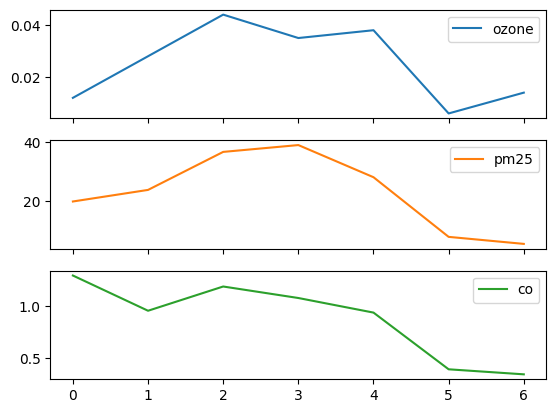

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv('nyc.csv')
# Inspect data
print(data.info())
# Convert the date column to datetime64
index = pd.to_datetime(data['date'])
# Set date column as index
pd.DataFrame({'date': index}).info()

# Inspect data 
print(data.info())

# Plot data
#date = data['date']
#study = data['ozone']
#plt.plot(date, study)
data.plot(subplots=True)
plt.show()


Datacamp's code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    7 non-null      object 
 1   ozone   7 non-null      float64
 2   pm25    7 non-null      float64
 3   co      7 non-null      float64
dtypes: float64(3), object(1)
memory usage: 352.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7 entries, 1999-07-01 to 1999-07-07
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   7 non-null      float64
 1   pm25    7 non-null      float64
 2   co      7 non-null      float64
dtypes: float64(3)
memory usage: 224.0 bytes
None


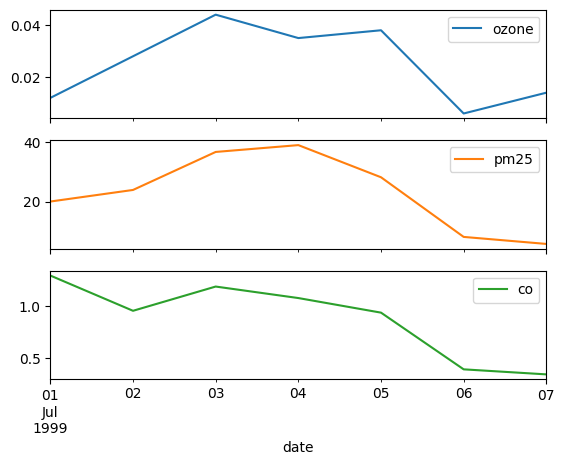

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

data = pd.read_csv('nyc.csv')
# Inspect data
print(data.info())
# Convert the date column to datetime64
data.date = pd.to_datetime(data.date)
# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True)
plt.show()


[*********************100%***********************]  1 of 1 completed


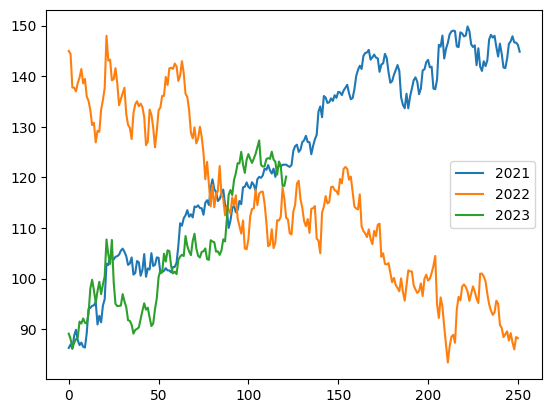

In [4]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)
# Create dataframe prices here
prices = pd.DataFrame()
#prices

# Select data for each year and concatenate with prices here 
for year in ['2021','2022','2023']:
    price_per_year = google.loc[year, ['Close']].reset_index(drop=True)
    price_per_year.rename(columns={'Close': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         24 non-null     object 
 1   Chicago      24 non-null     float64
 2   Los Angeles  24 non-null     float64
 3   New York     24 non-null     float64
dtypes: float64(3), object(1)
memory usage: 896.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2005-01-01 to 2006-01-12
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      24 non-null     float64
 1   Los Angeles  24 non-null     float64
 2   New York     24 non-null     float64
dtypes: float64(3)
memory usage: 768.0 bytes
None


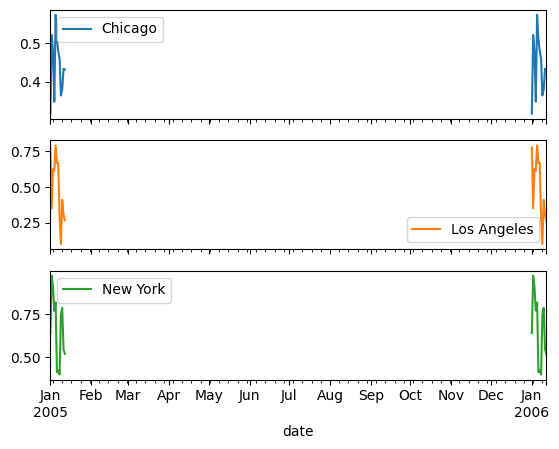

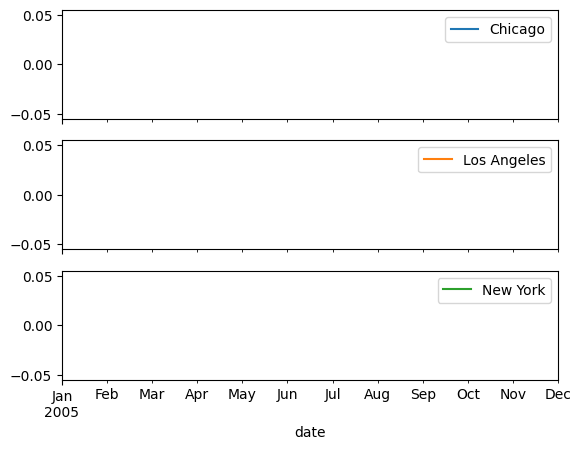

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

co = pd.read_csv('co_cities.csv')
# Inspect data
print(co.info())
# Convert the date column to datetime64
co.date = pd.to_datetime(co.date)
# Set date column as index
co.set_index('date', inplace=True)

# Inspect data 
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq('D')

# Plot the co
co.plot(subplots=True)
plt.show()


# Set frequency to monthly
co = co.asfreq('M')

# Plot the co
co.plot(subplots=True)
plt.show()



.shift()
Shifting values back & forth in time;
Get the difference for the period;
Compute the % change for the periods;


In [14]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime(2007,1,31)
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate)

# Create dataframe prices here

#shifting periods
google['shifted'] = google.Close.shift() #default: periods=1 forward
google['lagged'] = google.Close.shift(periods=-1) #1period back in time
google[['Close','shifted','lagged']]

[*********************100%***********************]  1 of 1 completed


,Close,shifted,lagged
Date,,,
2007-01-03,11.701451,NaN,12.093594
2007-01-04,12.093594,11.701451,12.191942
2007-01-05,12.191942,12.093594,12.101602
2007-01-08,12.101602,12.191942,12.149650
2007-01-09,12.149650,12.101602,12.248749
2007-01-10,12.248749,12.149650,12.505506
2007-01-11,12.505506,12.248749,12.637638
2007-01-12,12.637638,12.505506,12.619620
2007-01-16,12.619620,12.637638,12.444444


In [15]:
#call Financial Return
#calculate Rate of Change x**t / x**t-1
google['change'] = google.Close.div(google.shifted)
google[['Close','shifted','change']].head()

,Close,shifted,change
Date,,,
2007-01-03,11.701451,NaN,NaN
2007-01-04,12.093594,11.701451,1.033512
2007-01-05,12.191942,12.093594,1.008132
2007-01-08,12.101602,12.191942,0.992590
2007-01-09,12.149650,12.101602,1.003970


In [16]:
#calculate one-period percent change
google['return'] = google.change.sub(1).mul(100)
google[['Close','shifted','change','return']].head()

,Close,shifted,change,return
Date,,,,
2007-01-03,11.701451,NaN,NaN,NaN
2007-01-04,12.093594,11.701451,1.033512,3.351228
2007-01-05,12.191942,12.093594,1.008132,0.813229
2007-01-08,12.101602,12.191942,0.992590,-0.740986
2007-01-09,12.149650,12.101602,1.003970,0.397039


In [17]:
#.diff() difference in value for 2 adjacent periods x**t - x**t-1
google['diff'] = google.Close.diff()
google[['Close','diff']].head()

,Close,diff
Date,,
2007-01-03,11.701451,NaN
2007-01-04,12.093594,0.392142
2007-01-05,12.191942,0.098349
2007-01-08,12.101602,-0.090341
2007-01-09,12.149650,0.048048


In [20]:
# .pct_change() percent change for two adjacent periods x**t/x**t-1
google['pct_change'] = google.Close.pct_change().mul(100)
google[['Close','return','pct_change']].head()

,Close,return,pct_change
Date,,,
2007-01-03,11.701451,NaN,NaN
2007-01-04,12.093594,3.351228,3.351228
2007-01-05,12.191942,0.813229,0.813229
2007-01-08,12.101602,-0.740986,-0.740986
2007-01-09,12.149650,0.397039,0.397039


In [21]:
#google points several periods apart
google['return_3d'] = google.Close.pct_change(periods=3).mul(100)
google[['Close','return_3d']].head()

,Close,return_3d
Date,,
2007-01-03,11.701451,NaN
2007-01-04,12.093594,NaN
2007-01-05,12.191942,NaN
2007-01-08,12.101602,3.419664
2007-01-09,12.149650,0.463518


[*********************100%***********************]  1 of 1 completed


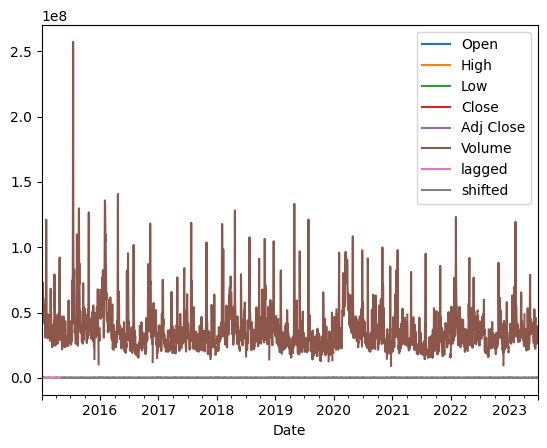

In [43]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2015,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate ) 

# Create dataframe prices here
prices = pd.DataFrame()

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)


# Plot the google price series
google.plot()
plt.show()



In [6]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2015,1,1)
enddate = datetime.now()
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate ) 

# Create dataframe prices here
prices = pd.DataFrame()

# Create shifted_30 here
google['shifted_30'] = google.Close.shift(30)

# Subtract shifted_30 from price
google['change_30'] =google.Close.sub(google.shifted_30)

# Get the 30-day price difference
google['diff_30'] =google.Close.diff(30)

# Inspect the last five rows of price
print(google.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(google.change_30.sub(google.diff_30).value_counts())



[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-06-26  120.760002  122.000000  118.269997  118.339996  118.339996   
2023-06-27  117.080002  119.080002  116.099998  118.330002  118.330002   
2023-06-28  117.089996  120.389999  116.849998  120.180000  120.180000   
2023-06-29  119.239998  120.059998  118.300003  119.099998  119.099998   
2023-06-30  120.169998  121.080002  119.690002  119.699997  119.699997   

              Volume  shifted_30  change_30   diff_30  
Date                                                   
2023-06-26  33969900  116.570000   1.769997  1.769997  
2023-06-27  39535900  117.510002   0.820000  0.820000  
2023-06-28  27091400  116.510002   3.669998  3.669998  
2023-06-29  24090900  119.510002  -0.410004 -0.410004  
2023-06-30  29519700  120.839996  -1.139999 -1.139999  
0.0    2108
dtype: i

In [4]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf

ticker = 'AAPL'
#SOLVE string problem
yf.pdr_override()
#compililng apple dataframe
from datetime import datetime
startdate = datetime(2013,1,1)
enddate = datetime(2016,1,1)
apple = pdr.get_data_yahoo(ticker,start=startdate, end=enddate ) 
#create dataframe prices
#prices = pd.DataFrame()

#set data freq to biz daily
apple = apple.asfreq('B')

# Created shifted_30 here
apple['shifted_30'] = apple.Close.shift(30)

# Subtract shifted_30 from price
apple['change_30'] = apple.Close.sub(apple.shifted_30)

# Get the 30-day price difference
apple['diff_30'] = apple.Close.diff(30)

# Inspect the last five rows of price
print(apple.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(apple.change_30.sub(apple.diff_30).value_counts())


[*********************100%***********************]  1 of 1 completed
                 Open       High     Low      Close  Adj Close       Volume  \
Date                                                                          
2015-12-25        NaN        NaN     NaN        NaN        NaN          NaN   
2015-12-28  26.897499  26.922501  26.545  26.705000  24.376947  106816800.0   
2015-12-29  26.740000  27.357500  26.715  27.184999  24.815105  123724800.0   
2015-12-30  27.145000  27.174999  26.795  26.830000  24.491053  100855200.0   
2015-12-31  26.752501  26.757500  26.205  26.315001  24.020948  163649200.0   

            shifted_30  change_30   diff_30  
Date                                         
2015-12-25   28.084999        NaN       NaN  
2015-12-28   28.545000  -1.840000 -1.840000  
2015-12-29   28.422501  -1.237501 -1.237501  
2015-12-30   29.322500  -2.492500 -2.492500  
2015-12-31   29.695000  -3.379999 -3.379999  
0.0    703
dtype: int64


my version

[*********************100%***********************]  1 of 1 completed


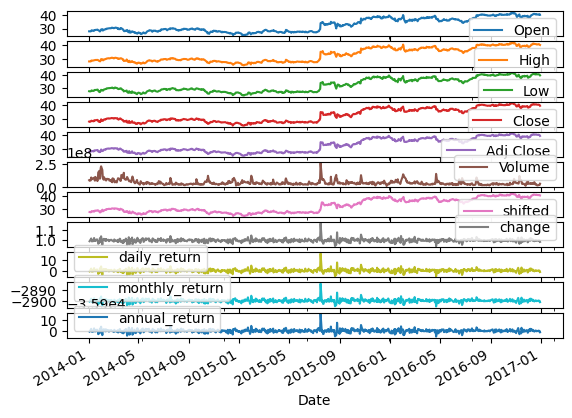

In [2]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2014,1,1)
enddate = datetime(2016,12,31)
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate ) 

#shifting periods
google['shifted'] = google.Close.shift()
#calculate Rate of Change x**t / x**t-1
google['change'] = google.Close.div(google.shifted)
# Create daily_return
google['daily_return'] = google.change.sub(1).mul(100)

# Create monthly_return
google['monthly_return'] = google.change.sub(30).mul(100)

# Create annual_return
google['annual_return'] = google.change.sub(360).mul(100)


#Plot the result
google.plot(subplots=True)
plt.show()



Datacamp's version

[*********************100%***********************]  1 of 1 completed


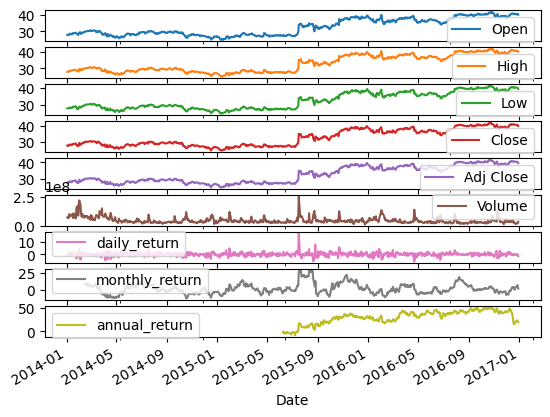

In [22]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

#solve string problem
yf.pdr_override()
#starting setup
y_symbols = ['GOOGL']
from datetime import datetime
startdate = datetime(2014,1,1)
enddate = datetime(2016,12,31)
google = pdr.get_data_yahoo(y_symbols,start=startdate, end=enddate ) 


# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()


[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Google Normalized Series'}, xlabel='Date'>

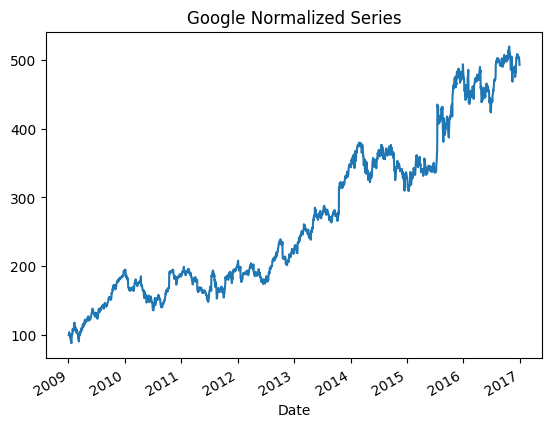

In [12]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## SOLVE STRING PROBLEM
yf.pdr_override()
## CALL DATA
ticker = 'GOOGL'
from datetime import datetime
startdate = datetime(2009,1,1)
enddate = datetime(2016,12,31)
google = pdr.get_data_yahoo(ticker,start=startdate,end=enddate) 

## INT-BASE SELECTION EASIER DON'T HV TO KNOW FIRST DATE DF STARTS
first_price = google.Close.iloc[0]
## ALTERNATIVE USE LOC[] NEED TO SPECIFY THE FIRST DATA
#first_price = google.loc['2010-01-04','Close']
#google.head(3)

## NORMALIZING A SINGLE SERIES div().mul() incr 150% orig value
normalized = google.Close.div(first_price).mul(100)
normalized.plot(title='Google Normalized Series')

## NORMALIZING MULTIPLE SERIES



[*********************100%***********************]  3 of 3 completed


<Axes: title={'center': 'Apple, Google, Las Vegas Series'}, xlabel='Date'>

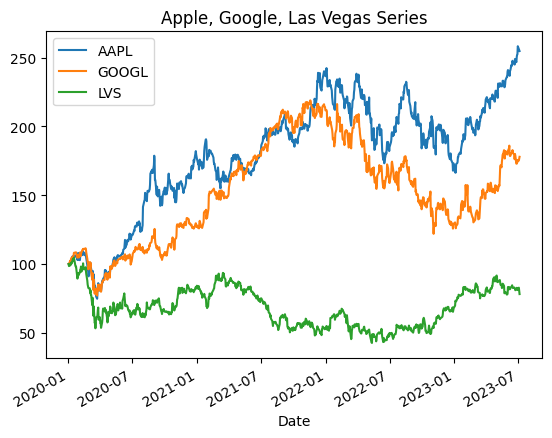

In [25]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## SOLVE STRING PROBLEM
yf.pdr_override()
## CALL DATA
ticker_list = ['GOOGL','AAPL','LVS']

from datetime import datetime
startdate = datetime(2020,1,1)
enddate = datetime.now()
prices = pdr.get_data_yahoo(ticker_list,start=startdate,end=enddate) 

## INT-BASE FIRST DATE DF STARTS
first_price = prices.Close.iloc[0]
#first_price.head(2)

## NORMALIZING MULTIPLE SERIES
normalized = prices.Close.div(first_price).mul(100)
normalized.plot(title='Apple, Google, Las Vegas Series')


[*********************100%***********************]  4 of 4 completed


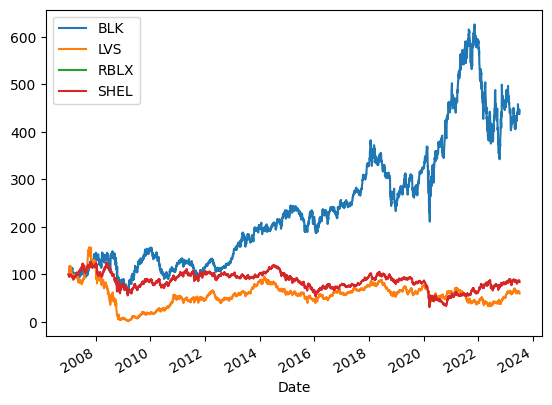

In [3]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## SOLVE STRING PROBLEM
yf.pdr_override()
## CALL DATA
ticker_list = ['LVS','RBLX','BLK','SHEL']

from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()

## IMPORT DATA HERE
prices = pdr.get_data_yahoo(ticker_list,start=startdate,end=enddate) 

## IMPORT DATA HERE (datacamp)
#prices = pd.read_csv('asset_classes.csv', parse_dates=['DATE'], index_col='DATE')

## COMBINING SERIES OF DATA (datacamp)
#prices = pd.concat([prices, index], axis=1).dropna()

# Select first prices
first_prices = prices.Close.iloc[0]

# Create normalized_prices
normalized = prices.Close.div(first_prices).mul(100)

# Plot normalized_prices
normalized.plot()
plt.show()


[*********************100%***********************]  4 of 4 completed
GOLD    29.830000
JNJ     66.400002
JPM     48.070000
XOM     74.110001
Name: 2007-01-03 00:00:00, dtype: float64


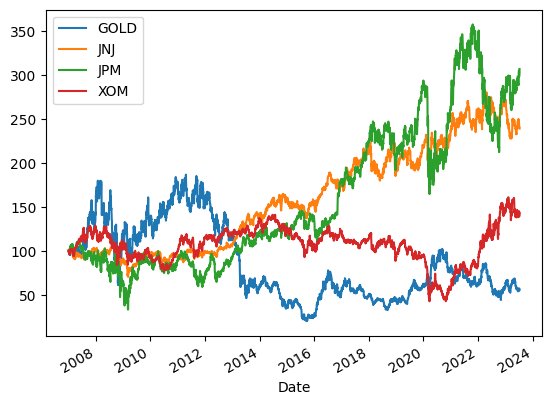

In [2]:
import datetime as dt
import pandas_datareader.data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## SOLVE STRING PROBLEM
yf.pdr_override()
## CALL DATA
ticker_list = ['JNJ','JPM','XOM','Gold']
ticker_list1 = ['Gold']

## call data range
from datetime import datetime
startdate = datetime(2007,1,1)
enddate = datetime.now()

## IMPORT DATA HERE
prices = pdr.get_data_yahoo(ticker_list,start=startdate,end=enddate) 
#prices1 = pdr.get_data_yahoo(ticker_list1,start=startdate,end=enddate) 

## INT-BASE FIRST DATE DF STARTS
df = prices.Close.iloc[0]
#df1 = prices1.Close.iloc[0]

# Import stock prices and index here (Datacamp)
#stocks = pd.read_csv('nyse.csv', parse_dates=['date'], index_col='date')
#dow_jones = pd.read_csv('dow_jones.csv', parse_dates=['date'], index_col='date')

# CONCATENATE TWO LIST AND INSPECT RESULT HERE (Datacamp)
#data = pd.concat([ticker_list, ticker_list1], axis=1)
print(df)


# Normalize and plot your data here
normalized = prices.Close.div(df).mul(100)
normalized.plot()

plt.show()

check combining dataframe in sparks - test pte repo in github

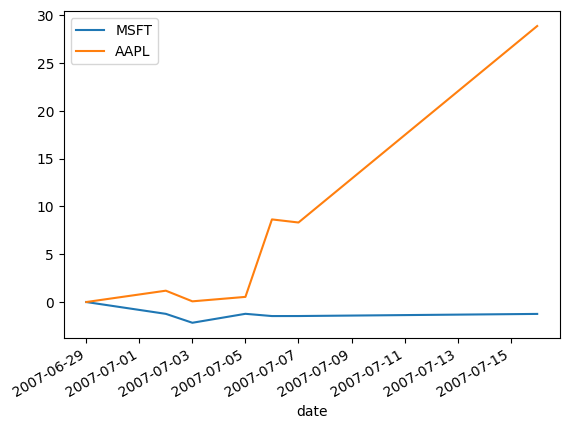

In [9]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
# Create tickers
tickers = ['MSFT','AAPL']

# Import stock data here
stocks = pd.read_csv('msft_aapl.csv', parse_dates=['date'], index_col='date')

# Import index here
sp500 = pd.read_csv('sp500.csv', parse_dates=['date'], index_col='date')

# Concatenate stocks and index here
data = pd.concat([stocks, sp500], axis=1).dropna()

# Normalize data
normalized = data.div(data.iloc[0]).mul(100)

# Subtract the normalized index from the normalized stock prices, and plot the result
normalized[tickers].sub(normalized['SP500'], axis=0).plot()
plt.show()




UPSAMPLING DATA

In [3]:
import pandas as pd
import datetime as dt

dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1,5)
quarterly = pd.Series(data=data, index=dates)
quarterly

2016-03-31    1
2016-06-30    2
2016-09-30    3
2016-12-31    4
Freq: Q-DEC, dtype: int64

In [2]:
import pandas as pd
import datetime as dt

dates = pd.date_range(start='2016', periods=4, freq='Q')
data = range(1,5)
quarterly = pd.Series(data=data, index=dates)

monthly = quarterly.asfreq('M') # to month-end freq
monthly # you may consider the 1st 2 months as missing

2016-03-31    1.0
2016-04-30    NaN
2016-05-31    NaN
2016-06-30    2.0
2016-07-31    NaN
2016-08-31    NaN
2016-09-30    3.0
2016-10-31    NaN
2016-11-30    NaN
2016-12-31    4.0
Freq: M, dtype: float64

In [16]:
#filling in the missing months
import pandas as pd
import datetime as dt

monthly = quarterly.asfreq('M') # to month-end freq
monthly = monthly.to_frame('baseline') # to DataFrame
monthly['ffill'] = quarterly.asfreq('M', method='ffill') #forward fill
monthly['bfill'] = quarterly.asfreq('M', method='bfill') #backward fill
monthly['value'] = quarterly.asfreq('M', fill_value=0) 
monthly # you may consider the 1st 2 months as missing

,baseline,ffill,bfill,value
2016-03-31,1.0,1,1,1
2016-04-30,NaN,1,2,0
2016-05-31,NaN,1,2,0
2016-06-30,2.0,2,2,2
2016-07-31,NaN,2,3,0
2016-08-31,NaN,2,3,0
2016-09-30,3.0,3,3,3
2016-10-31,NaN,3,4,0
2016-11-30,NaN,3,4,0
2016-12-31,4.0,4,4,4


If you compare the results, you see that forward fill propagates any value into the future if the future contains missing values. Backfill does the same for the past, and fill_value just substitutes missing values.

In [5]:
import pandas as pd
import datetime as dt
dates = pd.date_range(start='2016', periods=12,freq='M')
dates

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [8]:
import pandas as pd
import datetime as dt

# Set start and end dates
start = '2016-1-1'
end = '2016-2-29'

# Create monthly_dates here
monthly_dates = pd.date_range(start=start, end=end, freq='M')

# Create monthly here
monthly = pd.Series(data=[1,2], index=monthly_dates)
print(monthly)

# Create weekly_dates here
weekly_dates = pd.date_range(start=start, end=end, freq='W')

# Print monthly, reindexed using weekly_dates
print(monthly.reindex(weekly_dates))
print(monthly.reindex(weekly_dates, method='bfill'))
print(monthly.reindex(weekly_dates, method='ffill'))


2016-01-31    1
2016-02-29    2
Freq: M, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    NaN
2016-02-14    NaN
2016-02-21    NaN
2016-02-28    NaN
Freq: W-SUN, dtype: float64
2016-01-03    1
2016-01-10    1
2016-01-17    1
2016-01-24    1
2016-01-31    1
2016-02-07    2
2016-02-14    2
2016-02-21    2
2016-02-28    2
Freq: W-SUN, dtype: int64
2016-01-03    NaN
2016-01-10    NaN
2016-01-17    NaN
2016-01-24    NaN
2016-01-31    1.0
2016-02-07    1.0
2016-02-14    1.0
2016-02-21    1.0
2016-02-28    1.0
Freq: W-SUN, dtype: float64


            UNRATE
date              
2000-01-02    4.10
2000-01-09    3.80
2000-01-16    3.59
2000-01-23    3.38
2000-01-30    3.17
            UNRATE
date              
2000-01-02    4.10
2000-01-09    3.80
2000-01-16    3.59
2000-01-23    3.38
2000-01-30    3.17
            UNRATE
date              
2000-01-02    4.10
2000-01-09    3.80
2000-01-16    3.59
2000-01-23    3.38
2000-01-30    3.17


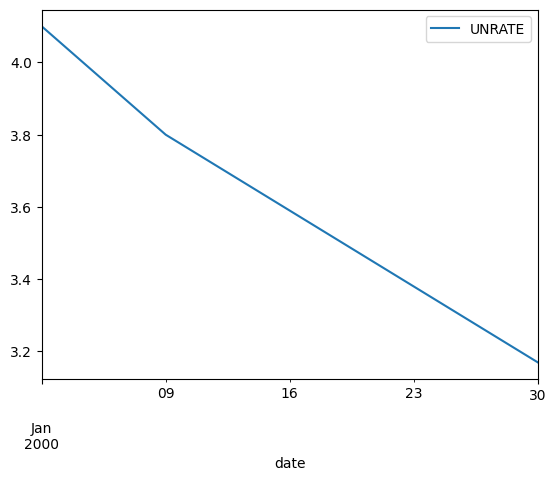

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
data = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date')

# Show first five rows of weekly series
print(data.asfreq('W').head())

# Show first five rows of weekly series with bfill option
print(data.asfreq('W', method='bfill').head())

# Create weekly series with ffill option and show first five rows
weekly_ffill = data.asfreq('W', method='ffill')
print(weekly_ffill.head())

# Plot weekly_fill starting 2015 here 
weekly_ffill.loc['2000':].plot()
plt.show()





In [1]:
#RESAMPLING
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
unrate = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date')
unrate.info()
unrate.head()
# Show first five rows of weekly series


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2000-01-01 to 2000-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  31 non-null     float64
dtypes: float64(1)
memory usage: 496.0 bytes


,UNRATE
date,
2000-01-01,4.0
2000-01-02,4.1
2000-01-03,4.0
2000-01-04,3.8
2000-01-05,4.0


In [15]:
#resample() is similar to groupby()
#RESAMPLING
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
unrate = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date')
unrate.asfreq('MS').info()
unrate.resample('MS') #creates Re sampler object
unrate.resample('MS').equals(unrate.resample('MS').asfreq())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1 entries, 2000-01-01 to 2000-01-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UNRATE  1 non-null      float64
dtypes: float64(1)
memory usage: 16.0 bytes


AttributeError: 'DatetimeIndexResampler' object has no attribute 'equals'

<Axes: xlabel='date'>

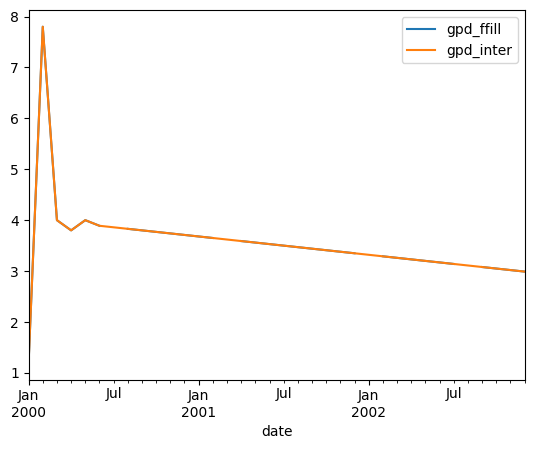

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
gdp = pd.read_csv('gpd.csv', parse_dates=['date'], index_col='date')
#gdp.info()
gdp.head(2)
#distingauish the label with add_suffix
gdp_1 = gdp.resample('MS').ffill().add_suffix('_ffill') #fill forward missing 
gdp_2 = gdp.resample('MS').interpolate().add_suffix('_inter') #find points on straight line between data

pd.concat([gdp_1, gdp_2], axis=1).loc['2000':].plot()




In [6]:
#concatenate 2 df
df1 = pd.DataFrame([1,2,3], columns=['df1'])
df2 = pd.DataFrame([4,5,6], columns=['df2'])

#pd.concat([df1,df2]) #default concat stacks the 2 df
pd.concat([df1, df2], axis=1) #axis=1 concat horizontally

,df1,df2
0,1,4
1,2,5
2,3,6


<Axes: xlabel='date'>

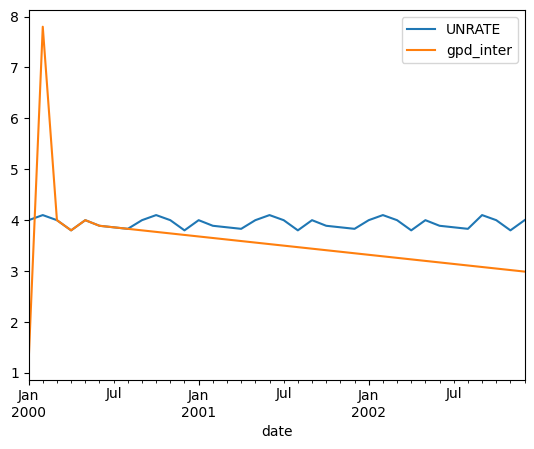

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Import data here
gdp = pd.read_csv('gpd.csv', parse_dates=['date'], index_col='date')
unrate = pd.read_csv('unemployment.csv', parse_dates=['date'], index_col='date')

#gdp.info()
gdp.head(2)
#distingauish the label with add_suffix
gdp_1 = gdp.resample('MS').ffill().add_suffix('_ffill') #fill forward missing 
gdp_2 = gdp.resample('MS').interpolate().add_suffix('_inter') #find points on straight line between data

pd.concat([unrate, gdp_2], axis=1).plot()